In [1]:
import gym

In [2]:
# to install gym_act:
# git clone https://github.com/PhilippeW83440/CS234_Project.git
# cd gym-act
# pip install -e .
import gym_act

# source code is in https://github.com/PhilippeW83440/CS234_Project/blob/master/gym-act/gym_act/envs/act_env.py
# or if you did: git clone https://github.com/PhilippeW83440/CS234_Project.git
# in CS234_Project/gym-act/gym_act/envs/act_env.py

# By default: ACT with 2 cars with CV (Constant Velocity) driver model
env = gym.make("Act-v0")

# ACT with 10 cars with CV (Constant Velocity) driver model
#env = gym.make("Act10cv-v0")

[2019-03-14 12:32:21,763] Making new env: Act-v0


ACT (Anti Collision Tests) with 2 cars using cv driver model
SEED 329655221806033094


/home/philippew/anaconda3/envs/py36/lib/python3.6/site-packages/gym/envs/registration.py:17: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [3]:
action = 0
obs, reward, done, info = env.step(action)
print("reward {}".format(reward))
img = env.render()

reward -1


In [4]:
import matplotlib.pyplot as plt
import cv2

def show_img(img):
    plt.imshow(img)
    plt.show()
    
def  resize_images(images, f=3):
    big_images = []
    for img in images:
        big_images.append(cv2.resize(img, None, fx=f, fy=f))
    return big_images

plt.rcParams["figure.figsize"]=10,10

# Load a trained Policy

In [5]:
import os
import os.path as osp
import tensorflow as tf
from spinup.utils.logx import restore_tf_graph

In [6]:
sess = tf.Session()

In [7]:
!ls data/td3/td3_s0/
fpath='data/td3/td3_s0/'

config.json    simple_save12  simple_save5  vars11.pkl	vars3.pkl  vars9.pkl
progress.txt   simple_save13  simple_save6  vars12.pkl	vars4.pkl  vars.pkl
simple_save    simple_save14  simple_save7  vars13.pkl	vars5.pkl
simple_save1   simple_save2   simple_save8  vars14.pkl	vars6.pkl
simple_save10  simple_save3   simple_save9  vars1.pkl	vars7.pkl
simple_save11  simple_save4   vars10.pkl    vars2.pkl	vars8.pkl


In [8]:
itr='last'
# handle which epoch to load from
if itr=='last':
    saves = [int(x[11:]) for x in os.listdir(fpath) if 'simple_save' in x and len(x)>11]
    itr = '%d'%max(saves) if len(saves) > 0 else ''
else:
    itr = '%d'%itr
print(itr)

14


In [9]:
model = restore_tf_graph(sess, osp.join(fpath, 'simple_save'+itr))
action_op = model['pi']

# make function for producing an action given a single state
get_action = lambda x : sess.run(action_op, feed_dict={model['x']: x[None,:]})[0]

# Load env used for training the policy

In [10]:
import joblib

state = joblib.load(osp.join(fpath, 'vars'+itr+'.pkl'))
env = state['env']

# Collect metrics on trained Policy

In [11]:
import numpy as np

max_episodes = 15
max_steps = 200

# METRICS
metric_success = 0 # EFFICIENCY
metric_steps_to_goal = [] # SAFETY
metric_hardbrake = [] # COMFORT
metric_cumulated_reward = []

for episode in range(max_episodes):
    print("====> Start episode {}".format(episode))
    state = env.reset()
    cumulated_reward = 0
    images = []
    
    hardbrake = 0    
    for n in range(max_steps):
        #action = 0
        action = get_action(state)
        #action = np.random.randint(low=-2,high=3) 
        if action <= -2:
            hardbrake += 1
        state, reward, done, info = env.step(action)
        env.penalty(state)
        cumulated_reward += reward
        print("Step {}: action={} reward={} done={}".format(n, action, reward, done)) # PHW DEBUG
        img = env.render()
        images.append(img)
        if done is True:
            if info == "success":
                metric_success += 1
                metric_steps_to_goal.append(n)
                metric_hardbrake.append(hardbrake)
                metric_cumulated_reward.append(cumulated_reward)
            print("End of episode {} with cumulated_reward {}".format(episode, cumulated_reward))
            break

print("METRICS: REWARD AvgCumulatedReward = {:.2f}".format(np.mean(metric_cumulated_reward)))
print("METRICS: SAFETY %collisions = {:.2f}, COMFORT MeanHardBrake = {:.2f}, EFFICIENCY MeanStepsToGoal = {:.2f}".format(1-metric_success/max_episodes, np.mean(metric_hardbrake), np.mean(metric_steps_to_goal)))

====> Start episode 0
Step 0: action=[2.] reward=-1 done=False
Step 1: action=[2.] reward=-1 done=False
Step 2: action=[2.] reward=-1 done=False
Step 3: action=[2.] reward=-1 done=False
Step 4: action=[2.] reward=-1 done=False
Step 5: action=[2.] reward=-1 done=False
Step 6: action=[2.] reward=-1 done=False
Step 7: action=[2.] reward=-1 done=False
Step 8: action=[2.] reward=-1 done=False
Step 9: action=[2.] reward=-1 done=False
Step 10: action=[2.] reward=-1 done=False
Step 11: action=[2.] reward=-1 done=False
Step 12: action=[2.] reward=-1 done=False
Step 13: action=[2.] reward=-1 done=False
Step 14: action=[2.] reward=-1 done=False
Step 15: action=[2.] reward=-1 done=False
Step 16: action=[2.] reward=-1 done=False
Step 17: action=[2.] reward=-1 done=False
Step 18: action=[2.] reward=-1 done=False
Step 19: action=[2.] reward=-1 done=False
Step 20: action=[2.] reward=-1 done=False
Step 21: action=[2.] reward=-1 done=False
Step 22: action=[2.] reward=-1 done=False
Step 23: action=[2.] r

In [12]:
print(metric_hardbrake)
print(metric_steps_to_goal)
print(metric_success)
print(max_episodes)

[0, 0, 14, 0, 14, 0, 0, 0, 0, 0, 0, 11, 0]
[36, 44, 51, 36, 54, 36, 36, 36, 36, 36, 36, 50, 36]
13
15


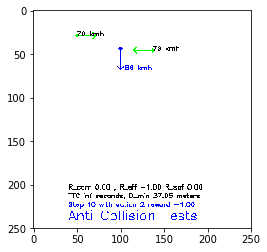

In [13]:
show_img(images[9])

# Visualization

In [ ]:
import imageio
from IPython.core.display import HTML

In [ ]:
imageio.mimsave('img/visu.gif', images, duration=0.2)
HTML("""<img src="img/visu.gif"/>""")

In [ ]:
big_images = resize_images(images, f=2)
imageio.mimsave('img/visu2.gif', big_images, duration=0.2)
HTML("""<img src="img/visu2.gif"/>""")